<a href="https://colab.research.google.com/github/AthaSSiN/ACA_PML/blob/master/ACA_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
(trainX, trainY) , (testX , testY) = mnist.load_data()

#normalizing train and test data
trainX = trainX/255
testX = testX/255

# converting data into tuple form of image and value (though not required)
train = [[trainX[i].reshape(784), trainY[i]] for i in range(len(trainX))]
test = [[testX[i].reshape(784), testY[i]] for i in range(len(testX))]

print(len(train))
print(len(train[0])) 



60000
2


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [0]:
batchSize = 60000 #Batch EM
K = 10 #number of classes > 10 to increase accuracy of classifcationn
n = len(train)

pi = 0.1*np.ones(K)
print(pi)

mu = np.random.randn(K,784)/2 + 0.5 #centering mu about 0.5

sig = [np.identity(784) for i in range(K)]

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


In [0]:
def calc(miniBatch, pi, mu, sig):
 
 #-----------------E step----------------------
  Ez = np.zeros((batchSize, K)) # expectancy values of z[i,j]
  temp = np.zeros((batchSize, 784)) # for storing values of input images

  for index, x in enumerate(miniBatch):
    temp[index] = x[0]
    
    # omitting sigma terms in exponent as  it was initialized with identity and there's only 1 epoch
    vals = [pi[k]*np.exp(-0.5*np.dot(temp[index]-mu[:][k], temp[index]-mu[:][k])) for k in range(K)]
    valSum = np.sum(vals)
    Ez[index] = [vals[p]/valSum for p in range(K)]

  #-----------------M step ------------------------ 
  print(Ez)

  Nk = np.sum(Ez, axis = 0) 
  pi = Nk/batchSize
  
  for k in range (K):
    mu[k] = np.sum((temp.T * Ez[:, k]).T, axis = 0) / Nk[k]
    sig[k] = np.sum([((np.matmul(temp[i] - mu[k], temp[i]-mu[k]) * Ez[i, k])) / Nk[k] for i in range(batchSize)], axis = 0)

In [0]:
#train the batch
calc(train, pi, mu, sig)


[[3.82828876e-05 1.36689487e-08 4.32532588e-05 ... 4.42500501e-02
  7.17967619e-01 9.52159859e-04]
 [1.61876413e-02 3.66390075e-10 1.26432973e-07 ... 6.20528842e-08
  1.22197391e-04 4.85836834e-05]
 [1.12459413e-08 1.34926646e-06 9.89026656e-03 ... 1.36487395e-01
  6.21998843e-01 5.30068108e-02]
 ...
 [1.33517325e-06 2.64896721e-08 1.04365474e-06 ... 2.25541022e-01
  6.57618436e-01 7.26058151e-03]
 [4.93102599e-01 2.27975003e-07 4.49393821e-03 ... 3.71238264e-03
  7.76194993e-02 2.59286864e-01]
 [1.15146707e-06 2.79231347e-02 1.90701096e-03 ... 6.62293478e-03
  2.25635924e-02 5.10509219e-02]]


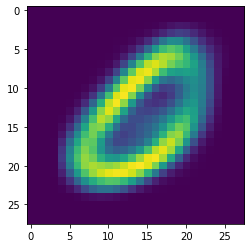

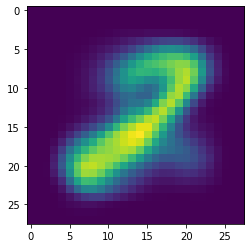

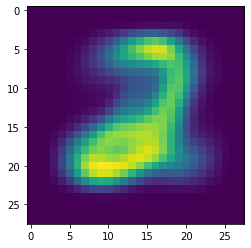

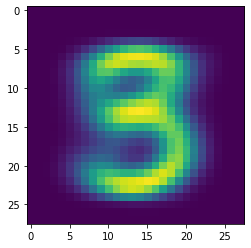

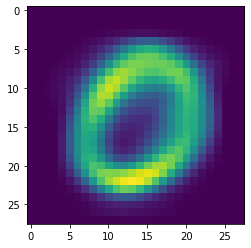

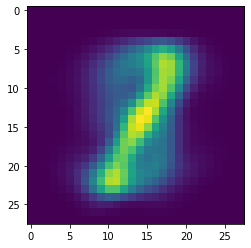

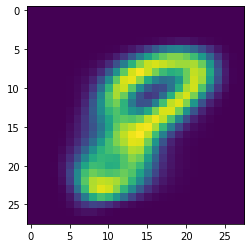

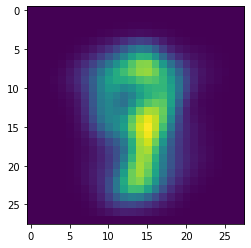

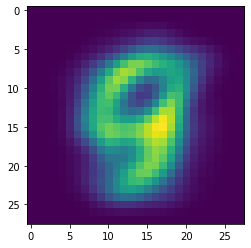

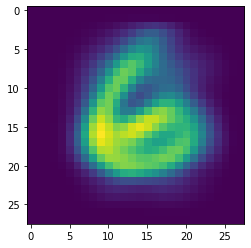

In [0]:
for i in range(K):
  plt.imshow(mu[i].reshape(28,28))
  plt.show()